In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv('D:\\Oasis Infobyte Internship\\Task5\\Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data = data.drop(columns = ['Unnamed: 0'])
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
TV_range = (data['TV'].min() , data['TV'].max())
TV_range

(0.7, 296.4)

# Relationship between TV & Sales

Text(0.5, 1.0, 'relation between TV & Sales ')

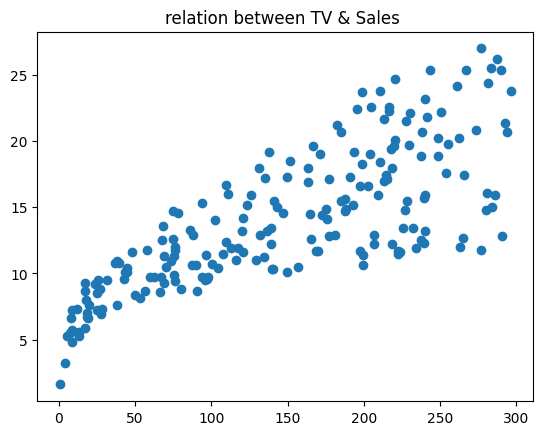

In [21]:
plt.scatter(data['TV'] , data['Sales'])
plt.title("relation between TV & Sales ")

Text(0.5, 1.0, 'relation between TV & Sales ')

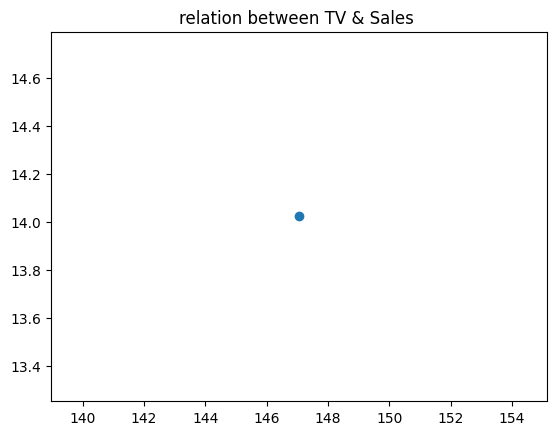

In [22]:
plt.scatter(data['TV'].mean() , data['Sales'].mean())
plt.title("relation between TV & Sales ")

# Relationship between Radio & Sales 

In [15]:
radio_range = (data['Radio'].min() , data['Radio'].max())
radio_range

(0.0, 49.6)

Text(0.5, 1.0, 'relation between Radio & Sales ')

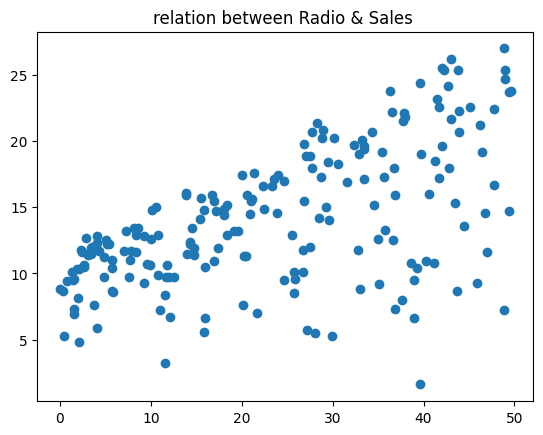

In [23]:
plt.scatter(data['Radio'] , data['Sales'])
plt.title("relation between Radio & Sales ")

Text(0.5, 1.0, 'relation between Radio & Sales ')

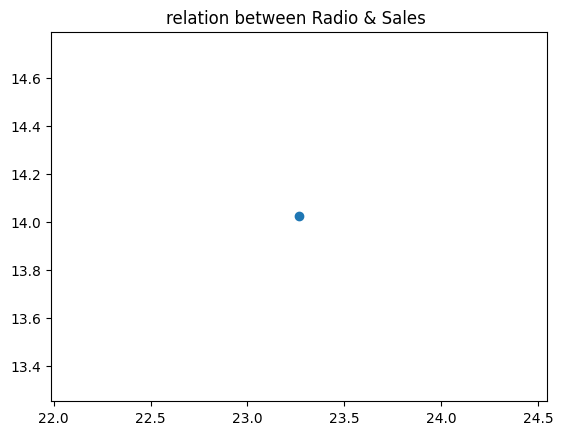

In [24]:
plt.scatter(data['Radio'].mean() , data['Sales'].mean())
plt.title("relation between Radio & Sales ")

In [25]:
news_range = (data['Newspaper'].min() , data['Newspaper'].max())
news_range

(0.3, 114.0)

Text(0.5, 1.0, 'relation between Newspaper & Sales ')

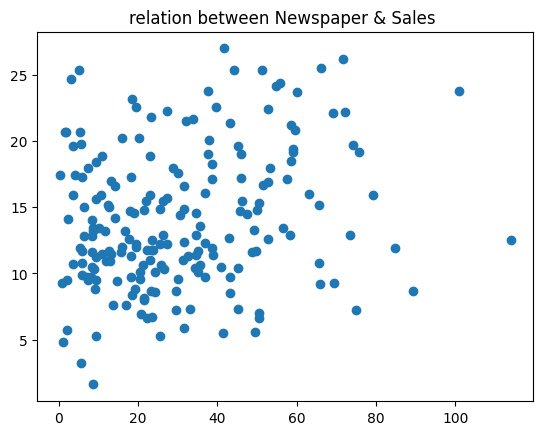

In [26]:
plt.scatter(data['Newspaper'], data['Sales'])
plt.title("relation between Newspaper & Sales ")

Text(0.5, 1.0, 'relation between Newspaper & Sales ')

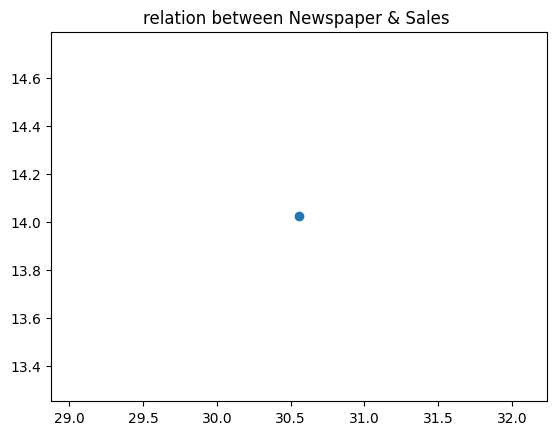

In [27]:
plt.scatter(data['Newspaper'].mean() , data['Sales'].mean())
plt.title("relation between Newspaper & Sales ")

In [28]:
from sklearn.preprocessing import MinMaxScaler 

In [29]:
scaler = MinMaxScaler()

In [31]:
x = data.drop(columns = ['Sales'])

In [32]:
y = data['Sales']

In [33]:
x = scaler.fit_transform(x) 

In [34]:
x = pd.DataFrame(x)

In [35]:
x

,0,1,2
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994
...,...,...,...
195,0.126818,0.074597,0.118734
196,0.316199,0.098790,0.068602
197,0.596212,0.187500,0.053650
198,0.956713,0.846774,0.579595


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
reg = LinearRegression()

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = 0.2 , random_state = 0)


In [39]:
reg  = LinearRegression()

In [40]:
reg.fit(x_train , y_train)

LinearRegression()

In [41]:
y_pred = reg.predict(x_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 4.4021182914496855
Root Mean Squared Error: 2.0981225634956804
Mean Absolute Error: 1.361781350209028
R-squared Score: 0.8601145185017868


In [44]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,10.057396
1,7.452281
2,7.019708
3,24.080297
4,12.017863
5,6.537939
6,12.782869
7,15.109746
8,10.769740
9,16.343580


In [45]:
print(y_test)

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales, dtype: float64


In [46]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

SVR()

In [50]:
regressor_res = regressor.predict(x_test)

In [52]:
regressor_res = pd.DataFrame(regressor_res)
regressor_res

,0
0,10.442422
1,8.714964
2,9.210325
3,22.551117
4,12.046844
5,8.688801
6,11.269568
7,13.285022
8,10.200996
9,16.577449


In [51]:
mse = mean_squared_error(y_test, regressor_res)
rmse = mean_squared_error(y_test, regressor_res, squared=False)
mae = mean_absolute_error(y_test, regressor_res)
r2 = r2_score(y_test, regressor_res)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 3.34772431313963
Root Mean Squared Error: 1.8296787458839954
Mean Absolute Error: 0.9980880391688011
R-squared Score: 0.8936198447060371
